# Population of the US counties


## Pull data from datasource, put into a dataframe, strip the csv down to needed info

***data pulled from https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html***

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# set path to data folder in case we move this all around
path_to_home = '../'
path_to_data = 'data/BIG-QUERY/'
filename = 'clean_county_population.csv'

cnty_pops = pd.read_csv(path_to_home+path_to_data+filename)

In [71]:
cnty_pops.head()

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States of America,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,".Autauga County, Alabama",54571,54597,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,".Baldwin County, Alabama",182265,182265,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,".Barbour County, Alabama",27457,27455,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
4,".Bibb County, Alabama",22915,22915,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394


In [72]:
cnty_pops.columns

Index(['Geographic Area', 'Census', 'Estimates Base', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [73]:
df = cnty_pops.drop(0)
df = df[['Geographic Area', '2019']]
df.head()

,Geographic Area,2019
1,".Autauga County, Alabama",55869
2,".Baldwin County, Alabama",223234
3,".Barbour County, Alabama",24686
4,".Bibb County, Alabama",22394
5,".Blount County, Alabama",57826


In [74]:
df.rename(columns={'Geographic Area': 'county_state', '2019': 'population'}, inplace=True)
df.head()

,county_state,population
1,".Autauga County, Alabama",55869
2,".Baldwin County, Alabama",223234
3,".Barbour County, Alabama",24686
4,".Bibb County, Alabama",22394
5,".Blount County, Alabama",57826


Create two seperate columns for county_name and state_name

In [75]:
def no_dots(cnt):
    return cnt.replace(".", "")

df['county_state'] = df['county_state'].apply(no_dots)
df.head()

,county_state,population
1,"Autauga County, Alabama",55869
2,"Baldwin County, Alabama",223234
3,"Barbour County, Alabama",24686
4,"Bibb County, Alabama",22394
5,"Blount County, Alabama",57826


In [76]:
#df[['First','Last']] = df.Name.str.split("_",expand=True,)

df[['county_name', 'state_name']] = df['county_state'].str.split(", ", expand=True)
df.head()

,county_state,population,county_name,state_name
1,"Autauga County, Alabama",55869,Autauga County,Alabama
2,"Baldwin County, Alabama",223234,Baldwin County,Alabama
3,"Barbour County, Alabama",24686,Barbour County,Alabama
4,"Bibb County, Alabama",22394,Bibb County,Alabama
5,"Blount County, Alabama",57826,Blount County,Alabama


In [78]:
df.state_name[df['state_name']=='Alabama']

1     Alabama
2     Alabama
3     Alabama
4     Alabama
5     Alabama
       ...   
63    Alabama
64    Alabama
65    Alabama
66    Alabama
67    Alabama
Name: state_name, Length: 67, dtype: object

In [79]:
#df['county_name'] = df['county_name'].replace(" County", "")

In [80]:
df.head()

,county_state,population,county_name,state_name
1,"Autauga County, Alabama",55869,Autauga County,Alabama
2,"Baldwin County, Alabama",223234,Baldwin County,Alabama
3,"Barbour County, Alabama",24686,Barbour County,Alabama
4,"Bibb County, Alabama",22394,Bibb County,Alabama
5,"Blount County, Alabama",57826,Blount County,Alabama


In [81]:
df.county_state = df.county_state.replace(" County", "")
df.head()

,county_state,population,county_name,state_name
1,"Autauga County, Alabama",55869,Autauga County,Alabama
2,"Baldwin County, Alabama",223234,Baldwin County,Alabama
3,"Barbour County, Alabama",24686,Barbour County,Alabama
4,"Bibb County, Alabama",22394,Bibb County,Alabama
5,"Blount County, Alabama",57826,Blount County,Alabama


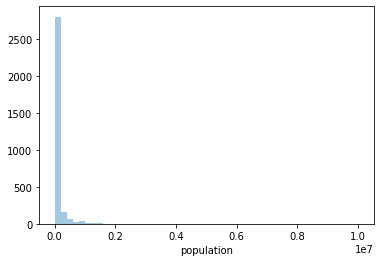

In [82]:
sns.distplot(df['population'], kde=False, bins = 50);

The above displot is not great, so fix that...but in the mean time
## Pull in the Covid data table and marry it with the population dataframe

In [83]:
covid = pd.read_csv(path_to_home+path_to_data+'cov_df.csv')
covid.head()
#covid.columns
covid.shape

(3282, 45)

## Normalize the dataframes
**Before we can marry the dataframes we will need to drop the location_key, country_code, country_name, change subregion1_name to state_name, change subregion2_name to county_name, drop the word " County" from county_name, and maybe more**

In [84]:
covid.drop(columns=(['location_key', 'country_code', 'country_name']), inplace=True)
covid.shape

(3282, 42)

In [85]:
covid.rename(columns=({'subregion1_name': 'state_name', 'subregion2_name': 'county_name'}), inplace=True)
covid.columns

Index(['date', 'subregion1_code', 'state_name', 'subregion2_code',
       'county_name', 'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3',
       'aggregation_level', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested',
       'new_hospitalized_patients', 'new_intensive_care_patients',
       'new_ventilator_patients', 'cumulative_hospitalized_patients',
       'cumulative_intensive_care_patients', 'cumulative_ventilator_patients',
       'current_hospitalized_patients', 'current_intensive_care_patients',
       'current_ventilator_patients', 'mobility_transit_stations',
       'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_residential', 'mobility_workplaces',
       'wikidata_id', 'datacommons_id', 'openstreetmap_id', 'latitude',
       'longitude', 'location_geometry', 'average_temperature_celsius',
       'minimum_tempe

In [99]:
covid['county_state'] = covid.county_name + ", " + covid.state_name

In [100]:
covid.head()

,date,subregion1_code,state_name,subregion2_code,county_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,new_deceased,...,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,county_state
0,2020-07-31,NaN,NaN,NaN,NaN,UM,UMI,0,NaN,NaN,...,2185386.0,19.300000,166.633333,POINT(166.633333 19.3),NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-31,NaN,NaN,NaN,NaN,VI,VIR,0,21.0,0.0,...,286898.0,18.333333,-64.833333,POINT(-64.833333 18.333333),NaN,NaN,NaN,NaN,NaN,NaN
2,2020-07-31,VA,Virginia,NaN,NaN,US,USA,1,984.0,33.0,...,224042.0,37.500000,-79.000000,POINT(-79 37.5),22.000000,20.722222,23.0,0.0,NaN,NaN
3,2020-07-31,VA,Virginia,51035.0,Carroll County,US,USA,2,2.0,3.0,...,2532620.0,36.730000,-80.730000,POINT(-80.73 36.73),NaN,NaN,NaN,NaN,NaN,"Carroll County, Virginia"
4,2020-07-31,WI,Wisconsin,NaN,NaN,US,USA,1,909.0,15.0,...,165466.0,44.500000,-89.500000,POINT(-89.5 44.5),22.277778,18.611111,25.5,0.0,NaN,NaN


In [101]:
covid.columns

Index(['date', 'subregion1_code', 'state_name', 'subregion2_code',
       'county_name', 'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3',
       'aggregation_level', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested',
       'new_hospitalized_patients', 'new_intensive_care_patients',
       'new_ventilator_patients', 'cumulative_hospitalized_patients',
       'cumulative_intensive_care_patients', 'cumulative_ventilator_patients',
       'current_hospitalized_patients', 'current_intensive_care_patients',
       'current_ventilator_patients', 'mobility_transit_stations',
       'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_residential', 'mobility_workplaces',
       'wikidata_id', 'datacommons_id', 'openstreetmap_id', 'latitude',
       'longitude', 'location_geometry', 'average_temperature_celsius',
       'minimum_tempe

## Create a new index
**In order to properly merge the two dataframes, create a constant index in each**

In [129]:
covid.set_index('county_state', inplace=True)
df.set_index('county_state', inplace=True)

In [154]:
#pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          #levels=None, names=None, verify_integrity=False, copy=True)


full_df = pd.concat([df, covid], axis=0, join='outer', ignore_index=False)
full_df.shape

(6424, 43)

In [155]:
full_df.head()

,population,county_name,state_name,date,subregion1_code,subregion2_code,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,...,datacommons_id,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm
county_state,,,,,,,,,,,,,,,,,,,,,
"Autauga County, Alabama",55869.0,Autauga County,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Baldwin County, Alabama",223234.0,Baldwin County,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Barbour County, Alabama",24686.0,Barbour County,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Bibb County, Alabama",22394.0,Bibb County,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Blount County, Alabama",57826.0,Blount County,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
full_df.shape

(6424, 43)

In [157]:
full_df.columns

Index(['population', 'county_name', 'state_name', 'date', 'subregion1_code',
       'subregion2_code', 'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3',
       'aggregation_level', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested',
       'new_hospitalized_patients', 'new_intensive_care_patients',
       'new_ventilator_patients', 'cumulative_hospitalized_patients',
       'cumulative_intensive_care_patients', 'cumulative_ventilator_patients',
       'current_hospitalized_patients', 'current_intensive_care_patients',
       'current_ventilator_patients', 'mobility_transit_stations',
       'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_residential', 'mobility_workplaces',
       'wikidata_id', 'datacommons_id', 'openstreetmap_id', 'latitude',
       'longitude', 'location_geometry', 'average_temperature_celsius',
       

In [158]:
cov_todo = full_df[['population', 'county_name', 'state_name', 'cumulative_confirmed',
       'cumulative_deceased', 'latitude', 'longitude']]

In [159]:
cov_todo.head()

,population,county_name,state_name,cumulative_confirmed,cumulative_deceased,latitude,longitude
county_state,,,,,,,
"Autauga County, Alabama",55869.0,Autauga County,Alabama,NaN,NaN,NaN,NaN
"Baldwin County, Alabama",223234.0,Baldwin County,Alabama,NaN,NaN,NaN,NaN
"Barbour County, Alabama",24686.0,Barbour County,Alabama,NaN,NaN,NaN,NaN
"Bibb County, Alabama",22394.0,Bibb County,Alabama,NaN,NaN,NaN,NaN
"Blount County, Alabama",57826.0,Blount County,Alabama,NaN,NaN,NaN,NaN


In [160]:
cov_todo.isna().sum()

population              3282
county_name               62
state_name                 3
cumulative_confirmed    3178
cumulative_deceased     3178
latitude                3142
longitude               3142
dtype: int64

In [161]:
cov_todo.shape

(6424, 7)

In [162]:
cov_todo[cov_todo.index=='Bibb County, Alabama']

,population,county_name,state_name,cumulative_confirmed,cumulative_deceased,latitude,longitude
county_state,,,,,,,
"Bibb County, Alabama",22394.0,Bibb County,Alabama,NaN,NaN,NaN,NaN
"Bibb County, Alabama",NaN,Bibb County,Alabama,363.0,2.0,32.997778,-87.126389


In [174]:
#full_df = pd.concat([df, covid], axis=0, join='outer', ignore_index=False)

#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, 
#               left_index=False, right_index=False, sort=False, 
#               suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

fuller_df = df.merge(covid, how='outer', left_index=True, 
                     right_on='county_state')

In [175]:
fuller_df.shape

(3374, 46)

In [176]:
fuller_df.head()

,county_state,population,county_name_x,state_name_x,date,subregion1_code,state_name_y,subregion2_code,county_name_y,iso_3166_1_alpha_2,...,datacommons_id,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm
"Autauga County, Alabama","Autauga County, Alabama",55869.0,Autauga County,Alabama,2020-07-31,AL,Alabama,1001.0,Autauga County,US,...,geoId/01001,NaN,32.536667,-86.648333,POINT(-86.648333333333 32.536666666667),26.652778,24.750000,30.236111,0.0,NaN
"Baldwin County, Alabama","Baldwin County, Alabama",223234.0,Baldwin County,Alabama,2020-07-31,AL,Alabama,1003.0,Baldwin County,US,...,geoId/01003,NaN,30.733056,-87.720278,POINT(-87.720277777778 30.733055555556),NaN,NaN,NaN,NaN,NaN
"Barbour County, Alabama","Barbour County, Alabama",24686.0,Barbour County,Alabama,2020-07-31,AL,Alabama,1005.0,Barbour County,US,...,geoId/01005,NaN,31.865833,-85.396111,POINT(-85.396111111111 31.865833333333),27.333333,25.222222,30.388889,0.0,NaN
"Bibb County, Alabama","Bibb County, Alabama",22394.0,Bibb County,Alabama,2020-07-31,AL,Alabama,1007.0,Bibb County,US,...,geoId/01007,NaN,32.997778,-87.126389,POINT(-87.126388888889 32.997777777778),26.811111,24.766667,30.433333,0.0,NaN
"Blount County, Alabama","Blount County, Alabama",57826.0,Blount County,Alabama,2020-07-31,AL,Alabama,1009.0,Blount County,US,...,geoId/01009,NaN,33.966667,-86.583333,POINT(-86.583333333333 33.966666666667),26.518519,25.277778,28.314815,0.0,NaN


In [177]:
fuller_df.isna().sum()

county_state                            62
population                             232
county_name_x                          232
state_name_x                           232
date                                    92
subregion1_code                         95
state_name_y                            95
subregion2_code                        154
county_name_y                          154
iso_3166_1_alpha_2                      92
iso_3166_1_alpha_3                      92
aggregation_level                       92
new_confirmed                          128
new_deceased                           128
new_recovered                         3326
new_tested                            3318
cumulative_confirmed                   128
cumulative_deceased                    128
cumulative_recovered                  3326
cumulative_tested                     3318
new_hospitalized_patients             3265
new_intensive_care_patients           3359
new_ventilator_patients               3366
cumulative_

In [182]:
cov_todo = fuller_df[['population', 'county_name_x', 'state_name_x', 'cumulative_confirmed',
       'cumulative_deceased', 'latitude', 'longitude']].copy()

In [183]:
cov_todo.rename(columns={'county_name_x': 'county_name', 
                         'state_name_x': 'state_name'}, inplace=True)

In [184]:
cov_todo.shape

(3374, 7)

In [185]:
cov_todo.isna().sum()

population              232
county_name             232
state_name              232
cumulative_confirmed    128
cumulative_deceased     128
latitude                 92
longitude                92
dtype: int64

In [186]:
cov_todo = cov_todo[cov_todo.county_name.notnull()]

In [187]:
cov_todo.isna().sum()

population                0
county_name               0
state_name                0
cumulative_confirmed    122
cumulative_deceased     122
latitude                 92
longitude                92
dtype: int64

In [189]:
cov_todo = cov_todo[(cov_todo.cumulative_confirmed.notnull()) & (cov_todo.cumulative_deceased.notnull())]

In [190]:
cov_todo.isna().sum()

population              0
county_name             0
state_name              0
cumulative_confirmed    0
cumulative_deceased     0
latitude                0
longitude               0
dtype: int64

In [191]:
cov_todo.shape

(3020, 7)

In [196]:
cov_todo.to_csv(path_to_home+path_to_data+'Covid_and_Pop_by_County.csv')

In [194]:
cov_todo.head()

,population,county_name,state_name,cumulative_confirmed,cumulative_deceased,latitude,longitude
"Autauga County, Alabama",55869.0,Autauga County,Alabama,1015.0,21.0,32.536667,-86.648333
"Baldwin County, Alabama",223234.0,Baldwin County,Alabama,3101.0,22.0,30.733056,-87.720278
"Barbour County, Alabama",24686.0,Barbour County,Alabama,598.0,5.0,31.865833,-85.396111
"Bibb County, Alabama",22394.0,Bibb County,Alabama,363.0,2.0,32.997778,-87.126389
"Blount County, Alabama",57826.0,Blount County,Alabama,767.0,3.0,33.966667,-86.583333
